In [1]:
import numpy as np    #Numpy import
import pandas as pd   #Pandase import

# jooniste kuvamiseks hiljem tuleb sisestada see rida...
%matplotlib notebook

## Sissejuhatus

Siin vihikus näitan pandase funktsioone mis on rohkem seotud andmete laadimisega erinevatest formaatidest, laetud andmete puhastamisega edasiseks analüüsiks ning lõpuks erinevates tabelites olevate andmete kokku panemist ühte tabelisse.

## Andmete parandamine

Tihti on vajalik andmete laadimise järgne parandamine ja ümbersättimine mis tuleneb sellest et kas me oleme andmete tähistamisel tähistanud neid erinevalt, Pandas on tekitanud artefakte andmete laadimise või siis tahame enne põhjalikumat andmetöötlust veel andmeid kuidagi paremini vormindada.


In [4]:
# näidis dataframe
df = pd.DataFrame([
                   [ 'esimene', np.nan, 2, np.nan, 0],
                   [ 'esimene',3, 4, np.nan, 1],
                   [ 'teine',np.nan, np.nan, np.nan, 5],
                   [ 'teine',2, 5, 1, 3]],
                   columns=['nimi']+list('ABCD'))

df

,nimi,A,B,C,D
0,esimene,NaN,2.0,NaN,0
1,esimene,3.0,4.0,NaN,1
2,teine,NaN,NaN,NaN,5
3,teine,2.0,5.0,1.0,3


### `.dropna()`
[Pandase DOC](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html)

Tihti esineb andmetes tühjasid väärtuseid mille Pandas loeb sisse kui `NaN` väärtused. Need pole tavaliselt edasise andmeanalüüsi juures vajalikud ja seetõttu on pandasel eraldi funktsioon nendest lahtisaamiseks.

Pandase meetod `dropna()` eemaldab meil tulpi või ridu milles esinevad `NaN` väärtused.

Ilma parameetriteta tagastatakse DataFrame kus kõik read milles esineb isegi üks `NaN` on eemaldatud.

In [5]:
df.dropna()

,nimi,A,B,C,D
3,teine,2.0,5.0,1.0,3


Parameetriga `how` saab määrata ära kas reas peavad olema kõik väärtused NaN-id (`how='all'`) või piisab ainult ühest väärtusest (`how='any'`).

In [6]:
df.dropna(how='any')

,nimi,A,B,C,D
3,teine,2.0,5.0,1.0,3


In [7]:
df.dropna(how='all')

,nimi,A,B,C,D
0,esimene,NaN,2.0,NaN,0
1,esimene,3.0,4.0,NaN,1
2,teine,NaN,NaN,NaN,5
3,teine,2.0,5.0,1.0,3


Parameetriga `axis` saame määrata kas me tahame filtreerida tulpi või ridu.

Pandases nimetatakse DataFrame-i ridu 0 teljeks või index-i teljeks (`axis=0` või `axis='index'`) ja tulpasid 1 teljeks (`axis=1` või `axis='columns'`). Vaikimisi toimivad suurem osa operatsioone nii just ridadel kuid axis parameetriga saab neid kasutada siis tulpadel.

In [8]:
df.dropna(axis=0)

,nimi,A,B,C,D
3,teine,2.0,5.0,1.0,3


In [9]:
df.dropna(axis=1)

,nimi,D
0,esimene,0
1,esimene,1
2,teine,5
3,teine,3


### `.fillna()`

[Pandase DOC](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html)

Vahest on vajalik NaN andmeid mitte kustutada vaid täita mingite arvuliste väärtustega.

In [10]:
df.fillna(value=0)

,nimi,A,B,C,D
0,esimene,0.0,2.0,0.0,0
1,esimene,3.0,4.0,0.0,1
2,teine,0.0,0.0,0.0,5
3,teine,2.0,5.0,1.0,3


Andes väärtusteks Pythoni dictionary saab eri tulpades asendada ka eri väärtusi

In [11]:
df.fillna(value={'A':1, 'B':2, 'C':3})

,nimi,A,B,C,D
0,esimene,1.0,2.0,3.0,0
1,esimene,3.0,4.0,3.0,1
2,teine,1.0,2.0,3.0,5
3,teine,2.0,5.0,1.0,3


### `.replace()`

[Pandase DOC](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.replace.html)

Kui meil on osades DataFrame-i lahtrites andmeid mida me tahaks asendada siis saab seda teha `.replace()` meetodiga. Tihti tuleb seda ette võttes kokku andmeid üle mitmete katsete mille juures on nimetatud katse töötlusi või muid parameetreid erinevate nimedega.

Kõige lihtsamal kasutamisel saab `.replace`-iga lihtsalt üksikuid väärtusi asendada andes ette parameertid `to_replace` ja `value`.

In [12]:
df.replace(to_replace='esimene', value='kolmas')

,nimi,A,B,C,D
0,kolmas,NaN,2.0,NaN,0
1,kolmas,3.0,4.0,NaN,1
2,teine,NaN,NaN,NaN,5
3,teine,2.0,5.0,1.0,3


Mitmeid väärtusi korraga saab vahetada, ning teha seda erinevates tulpades saab edastades `to_replace` parameetrina Pythoni dict-ionary kujul:
```
to_replace = {'tulp': {'v22rtus':'uus v22rtus'} }
```

In [13]:
df.replace(to_replace = {'nimi':{ 'esimene' : 'kolmas' ,'teine' : 'neljas'} })

,nimi,A,B,C,D
0,kolmas,NaN,2.0,NaN,0
1,kolmas,3.0,4.0,NaN,1
2,neljas,NaN,NaN,NaN,5
3,neljas,2.0,5.0,1.0,3


## Andmete ühendamine

Tihti on vaja ühendada omavahel andmeid erinevatest tabelitest. Kõige lihtsam näide sellise vajaduse jaoks on see kui oma proove kirjeldavad andmed on ühes failis ja kõikides mõõtmistes olete kirja pannud ainult proovi nime. Sellisel juhul tuleb hilisemaks analüüsiks andmed tuua alati esialgsest, nö proove kirjeldavast tabelist.

Pandasel saab kasutada kolme funktsiooni eri tabelites olevate andmete ühendamiseks: `.merge(), .join() ja .concat()`

[Pandase DOC](https://pandas.pydata.org/pandas-docs/stable/merging.html)

*mõelda siin kui süvitsi minna joinimistesse, vaadata datacarpentry loengutest ja enda kasutusest*

### `.merge()`

[Pandase DOC](https://pandas.pydata.org/pandas-docs/stable/merging.html#database-style-dataframe-joining-merging)

### `.join()`

### `.concat()`


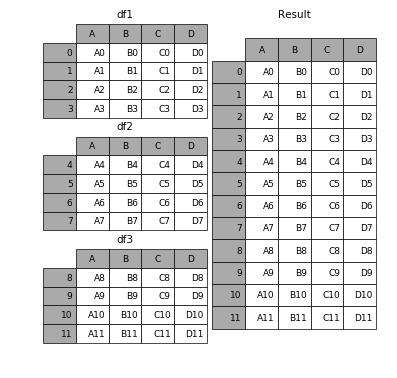


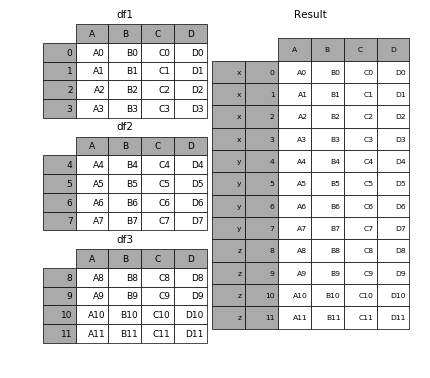